# Self-Driving Car Engineer Nanodegree

## Deep Learning

## Project: Build a Traffic Sign Recognition Classifier

In this notebook, a template is provided for you to implement your functionality in stages, which is required to successfully complete this project. If additional code is required that cannot be included in the notebook, be sure that the Python code is successfully imported and included in your submission if necessary. 

> **Note**: Once you have completed all of the code implementations, you need to finalize your work by exporting the iPython Notebook as an HTML document. Before exporting the notebook to html, all of the code cells need to have been run so that reviewers can see the final implementation and output. You can then export the notebook by using the menu above and navigating to  \n",
    "**File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission. 

In addition to implementing code, there is a writeup to complete. The writeup should be completed in a separate file, which can be either a markdown file or a pdf document. There is a [write up template](https://github.com/udacity/CarND-Traffic-Sign-Classifier-Project/blob/master/writeup_template.md) that can be used to guide the writing process. Completing the code template and writeup template will cover all of the [rubric points](https://review.udacity.com/#!/rubrics/481/view) for this project.

The [rubric](https://review.udacity.com/#!/rubrics/481/view) contains "Stand Out Suggestions" for enhancing the project beyond the minimum requirements. The stand out suggestions are optional. If you decide to pursue the "stand out suggestions", you can include the code in this Ipython notebook and also discuss the results in the writeup file.


>**Note:** Code and Markdown cells can be executed using the **Shift + Enter** keyboard shortcut. In addition, Markdown cells can be edited by typically double-clicking the cell to enter edit mode.

---
## Step 0: Load The Data

In [1]:
# Load pickled data
import pickle
import csv

training_file = 'data/train.p'
testing_file = 'data/test.p'

with open(training_file, mode='rb') as f:
    train = pickle.load(f)
with open(testing_file, mode='rb') as f:
    test = pickle.load(f)
    
X_train, y_train = train['features'], train['labels']
X_test, y_test = test['features'], test['labels']

# read csv to get sign names
sign_names = []
with open('signnames.csv') as signname_file:
    signname_reader = csv.DictReader(signname_file)
    sign_names = [row['SignName'] for row in signname_reader]

---

## Step 1: Dataset Summary & Exploration

The pickled data is a dictionary with 4 key/value pairs:

- `'features'` is a 4D array containing raw pixel data of the traffic sign images, (num examples, width, height, channels).
- `'labels'` is a 1D array containing the label/class id of the traffic sign. The file `signnames.csv` contains id -> name mappings for each id.
- `'sizes'` is a list containing tuples, (width, height) representing the original width and height the image.
- `'coords'` is a list containing tuples, (x1, y1, x2, y2) representing coordinates of a bounding box around the sign in the image. **THESE COORDINATES ASSUME THE ORIGINAL IMAGE. THE PICKLED DATA CONTAINS RESIZED VERSIONS (32 by 32) OF THESE IMAGES**

Complete the basic data summary below. Use python, numpy and/or pandas methods to calculate the data summary rather than hard coding the results. For example, the [pandas shape method](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.shape.html) might be useful for calculating some of the summary results. 

### Provide a Basic Summary of the Data Set Using Python, Numpy and/or Pandas

In [2]:
import numpy

assert(len(X_train) == len(y_train))
assert(len(X_test) == len(y_test))

# Number of training examples
n_train = X_train.shape[0]

# Number of testing examples.
n_test = X_test.shape[0]

# What's the shape of an traffic sign image?
image_shape = X_train[0].shape

# How many unique classes/labels there are in the dataset.
n_classes = numpy.unique(y_train).size

print("Number of training examples =", n_train)
print("Number of testing examples =", n_test)
print("Image data shape =", image_shape)
print("Number of classes =", n_classes)

Number of training examples = 34799
Number of testing examples = 12630
Image data shape = (32, 32, 3)
Number of classes = 43


### Include an exploratory visualization of the dataset

Visualize the German Traffic Signs Dataset using the pickled file(s). This is open ended, suggestions include: plotting traffic sign images, plotting the count of each sign, etc. 

The [Matplotlib](http://matplotlib.org/) [examples](http://matplotlib.org/examples/index.html) and [gallery](http://matplotlib.org/gallery.html) pages are a great resource for doing visualizations in Python.

**NOTE:** It's recommended you start with something simple first. If you wish to do more, come back to it after you've completed the rest of the sections. It can be interesting to look at the distribution of classes in the training, validation and test set. Is the distribution the same? Are there more examples of some classes than others?

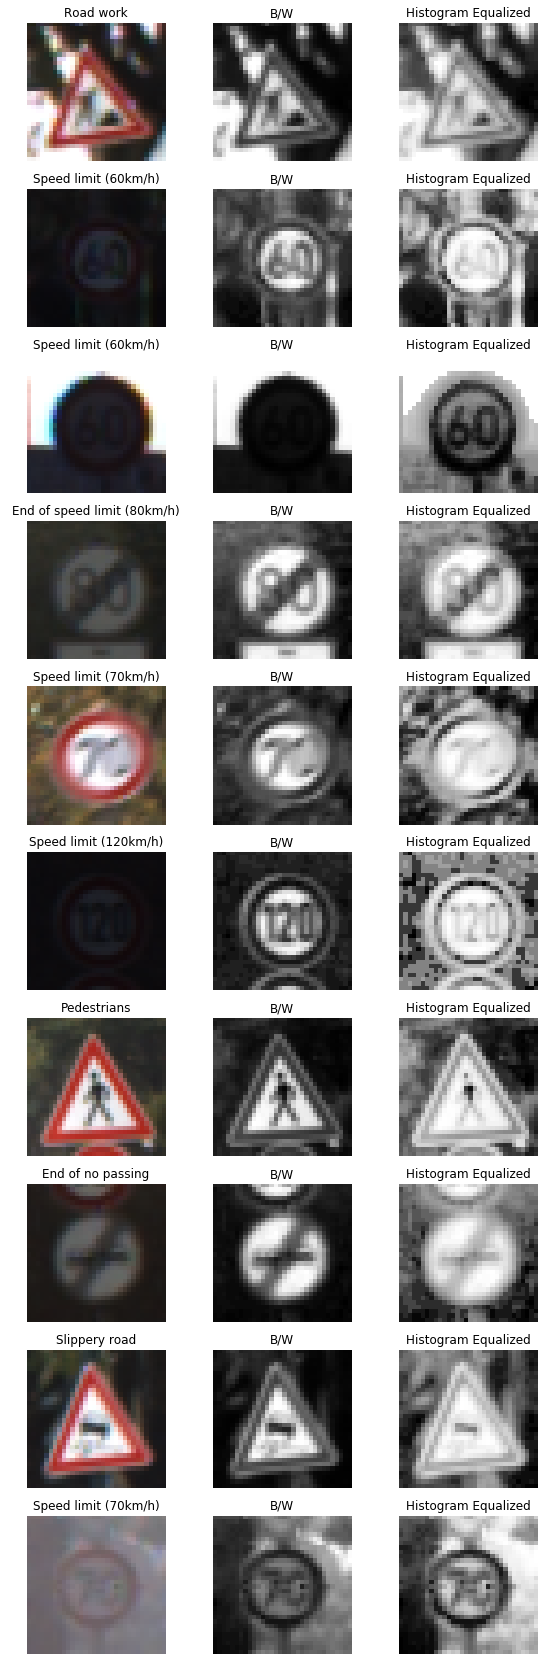

In [3]:
### Data exploration visualization goes here.
### Feel free to use as many code cells as needed.
import matplotlib.pyplot as plt
import random
import cv2
import numpy

# Visualizations will be shown in the notebook.
%matplotlib inline

# show image of N random data points
count = 10
fig, axs = plt.subplots(count, 3, figsize=(count, count*3))
fig.subplots_adjust(hspace = .2, wspace=.001)
axs = axs.ravel()
for i in range(0, count*3, 3):
    index = random.randint(0, len(X_train))
    image = X_train[index]
    
    axs[i].axis('off')
    axs[i].imshow(image)
    axs[i].set_title(sign_names[y_train[index]])

    bw = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)
    axs[i+1].axis('off')
    axs[i+1].imshow(bw, cmap='gray')
    axs[i+1].set_title("B/W")

    equ = cv2.equalizeHist(bw)
    axs[i+2].axis('off')
    axs[i+2].imshow(equ, cmap='gray')
    axs[i+2].set_title("Histogram Equalized")

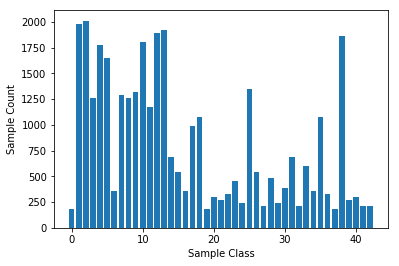

In [4]:
import numpy as np

# plotting the count of each sign

y_pos = range(n_classes)
label_list = y_train.tolist()
sign_type = [label_list.count(y) for y in range(n_classes)]

plt.bar(y_pos, sign_type, width=0.8, align='center')
plt.ylabel('Sample Count')
plt.xlabel('Sample Class')
plt.show()

----

## Step 2: Design and Test a Model Architecture

Design and implement a deep learning model that learns to recognize traffic signs. Train and test your model on the [German Traffic Sign Dataset](http://benchmark.ini.rub.de/?section=gtsrb&subsection=dataset).

The LeNet-5 implementation shown in the [classroom](https://classroom.udacity.com/nanodegrees/nd013/parts/fbf77062-5703-404e-b60c-95b78b2f3f9e/modules/6df7ae49-c61c-4bb2-a23e-6527e69209ec/lessons/601ae704-1035-4287-8b11-e2c2716217ad/concepts/d4aca031-508f-4e0b-b493-e7b706120f81) at the end of the CNN lesson is a solid starting point. You'll have to change the number of classes and possibly the preprocessing, but aside from that it's plug and play! 

With the LeNet-5 solution from the lecture, you should expect a validation set accuracy of about 0.89. To meet specifications, the validation set accuracy will need to be at least 0.93. It is possible to get an even higher accuracy, but 0.93 is the minimum for a successful project submission. 

There are various aspects to consider when thinking about this problem:

- Neural network architecture (is the network over or underfitting?)
- Play around preprocessing techniques (normalization, rgb to grayscale, etc)
- Number of examples per label (some have more than others).
- Generate fake data.

Here is an example of a [published baseline model on this problem](http://yann.lecun.com/exdb/publis/pdf/sermanet-ijcnn-11.pdf). It's not required to be familiar with the approach used in the paper but, it's good practice to try to read papers like these.

### Pre-process the Data Set (normalization, grayscale, etc.)

Minimally, the image data should be normalized so that the data has mean zero and equal variance. For image data, `(pixel - 128)/ 128` is a quick way to approximately normalize the data and can be used in this project. 

Other pre-processing steps are optional. You can try different techniques to see if it improves performance. 

Use the code cell (or multiple code cells, if necessary) to implement the first step of your project.

In [5]:
### Preprocess the data here.
import cv2
import numpy as np
from numpy import newaxis

# convert to B/W
X_train_bw = numpy.array([cv2.cvtColor(image, cv2.COLOR_RGB2GRAY) for image in X_train])
X_test_bw = numpy.array([cv2.cvtColor(image, cv2.COLOR_RGB2GRAY) for image in X_test])

# apply histogram equalization
X_train_hst_eq = numpy.array([cv2.equalizeHist(image) for image in X_train_bw])
X_test_hst_eq = numpy.array([cv2.equalizeHist(image) for image in X_test_bw])

# reshape for conv layer
X_train_reshaped = X_train_hst_eq[..., newaxis]
X_test_reshaped = X_test_hst_eq[..., newaxis]
print('Before shaping:', X_train_hst_eq.shape)
print('After shaping:', X_train_reshaped.shape)

# normalize range
X_train_normalized = X_train_reshaped - np.mean(X_train_reshaped)
X_test_normalized = X_test_reshaped - np.mean(X_test_reshaped)
print('Mean, min and max before normalizing:', np.mean(X_train_reshaped), np.min(X_train_reshaped), np.max(X_train_reshaped))
print('Mean, min and max after normalizing:', np.mean(X_train_normalized), np.min(X_train_normalized), np.max(X_train_normalized))

Before shaping: (34799, 32, 32)
After shaping: (34799, 32, 32, 1)
Mean, min and max before normalizing: 131.338788667 0 255
Mean, min and max after normalizing: -2.1667071584e-15 -131.338788667 123.661211333


<h3>Question 1 :</h3>
Describe how you preprocessed the data. Why did you choose that technique?

<h3>Answer:</h3>
1. The input images were converted to grayscale. This helps in reducing the amount of data to process and allows the network to learn faster as there is less complexity as well as it is easier to equalise the histogram in the next step
2. The brightness values are equalised using the histogram equalisation method.
3. Normalise the values to go from -1 to +1 instead of going from 0 to 255. This helps keep the weights smaller and lets the network fit the curve faster.

In [6]:
import scipy.ndimage

def create_variant(image):
    if (random.choice([True, False])):
        image = scipy.ndimage.interpolation.shift(image, [random.randrange(-2, 2), random.randrange(-2, 2), 0])
    else:
        image = scipy.ndimage.interpolation.rotate(image, random.randrange(-10, 10), reshape=False)
    return image

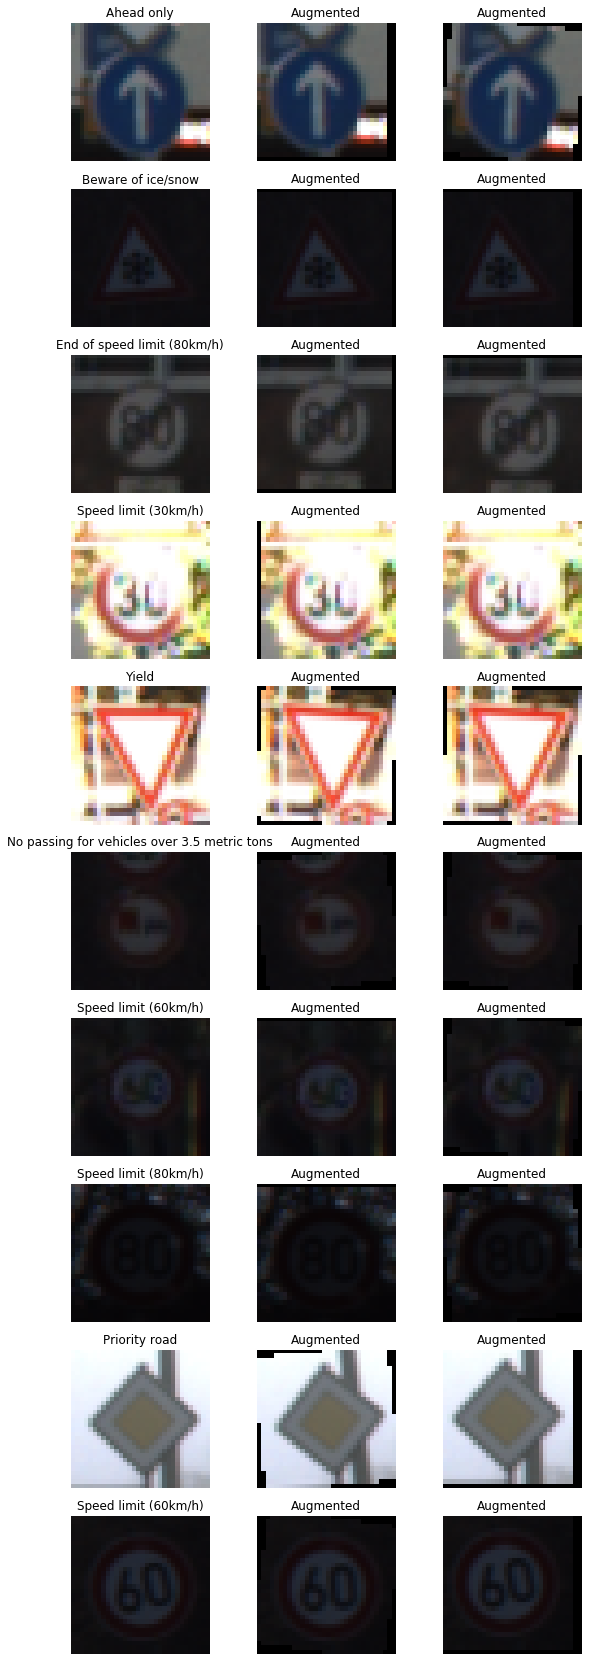

In [7]:
# show image of N random data points
count = 10
fig, axs = plt.subplots(count, 3, figsize=(count, count*3))
fig.subplots_adjust(hspace = .2, wspace=.001)
axs = axs.ravel()
for i in range(0, count*3, 3):
    index = random.randint(0, len(X_train))
    image = X_train[index]
    
    axs[i].axis('off')
    axs[i].imshow(image)
    axs[i].set_title(sign_names[y_train[index]])

    aug1 = create_variant(image)
    axs[i+1].axis('off')
    axs[i+1].imshow(aug1)
    axs[i+1].set_title("Augmented")
    
    aug2 = create_variant(image)
    axs[i+2].axis('off')
    axs[i+2].imshow(aug2)
    axs[i+2].set_title("Augmented")

In [8]:
### Generate data additional data (OPTIONAL!)
### and split the data into training/validation/testing sets here.
### Feel free to use as many code cells as needed.
    
# data augmentation
REQ_NUM_SAMPLES = 1000

generated_features = []
generated_labels = []

for class_index in range(len(sign_type)):
    class_sample_count = sign_type[class_index]
    augment_multiple = round(REQ_NUM_SAMPLES / class_sample_count)

    if augment_multiple <= 1:
        continue
    
    print("Class / Label {:d} has only {:d} samples, so augmenting {:d} times.".format(class_index, class_sample_count, augment_multiple))
    for test_feature, test_label in zip(X_train_normalized, y_train):
        if class_index == test_label:
            for augment_iter in range(augment_multiple):
                generated_features.append(create_variant(test_feature))
                generated_labels.append(test_label)

# append generated data to original data
X_train_augmented = np.append(np.array(X_train_normalized), np.array(generated_features), axis=0)
y_train_augmented = np.append(np.array(y_train), np.array(generated_labels), axis=0)

Class / Label 0 has only 180 samples, so augmenting 6 times.
Class / Label 6 has only 360 samples, so augmenting 3 times.
Class / Label 15 has only 540 samples, so augmenting 2 times.
Class / Label 16 has only 360 samples, so augmenting 3 times.
Class / Label 19 has only 180 samples, so augmenting 6 times.
Class / Label 20 has only 300 samples, so augmenting 3 times.
Class / Label 21 has only 270 samples, so augmenting 4 times.
Class / Label 22 has only 330 samples, so augmenting 3 times.
Class / Label 23 has only 450 samples, so augmenting 2 times.
Class / Label 24 has only 240 samples, so augmenting 4 times.
Class / Label 26 has only 540 samples, so augmenting 2 times.
Class / Label 27 has only 210 samples, so augmenting 5 times.
Class / Label 28 has only 480 samples, so augmenting 2 times.
Class / Label 29 has only 240 samples, so augmenting 4 times.
Class / Label 30 has only 390 samples, so augmenting 3 times.
Class / Label 32 has only 210 samples, so augmenting 5 times.
Class / La

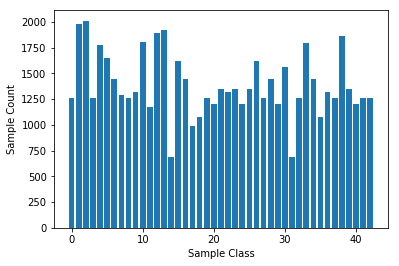

In [9]:
# plotting the count of each sign

y_pos = range(n_classes)
label_list = y_train_augmented.tolist()
sign_type = [label_list.count(y) for y in range(n_classes)]

plt.bar(y_pos, sign_type, width=0.8, align='center')
plt.ylabel('Sample Count')
plt.xlabel('Sample Class')
plt.show()


In [10]:
from sklearn.model_selection import train_test_split

# create validation set from training data
X_training, X_validation, y_training, y_validation = train_test_split(X_train_augmented, y_train_augmented, test_size=0.2)


<h3>Question 2 :</h3> 
Describe how you set up the training, validation and testing data for your model. Optional: If you generated additional data, how did you generate the data? Why did you generate the data? What are the differences in the new dataset (with generated data) from the original dataset?

<h3>Answer:</h3>
1. Testing data was already there. For validation data, a random slice of the Training data is taken.
2. To generate additional/new data, I first found the ratio between expected number of samples and actual. Then I took created random rotated variations on the images to satisfy expected sample count.
3. I generated this new data so that each class is equally represented in the data.
4. The difference between original and create data is that they are either rotated or translated randomly.


<h1>Model Architecture</h1>

<h3>Question 3 :</h3>
What does your final architecture look like? (Type of model, layers, sizes, connectivity, etc.) 

<h3>Answer:</h3>
I am using the LeNet architecture. I have two layers of convolution with max-pooling. After than we have 3 fully connected layers. I briefly tried pruning the network and was able to get same performance out of just one single convolution layer, if I kept the kernel size high. I learnt that by splitting it into two layers with smaller kernel sizes, we can reduce compute load.

Layer 1: Convolution with 5x5 kernel and stride of 1 and output depth of 16. Max-pooled with stride 2.

Layer 2: Convolution with 5x5 kernel and stride of 1 and output depth of 32. Max-pooled with stride 2.

[Flatten]

[Dropout with keep probability of 0.8]

Layer 3: Fully-connected layer with 128 nodes.

Layer 4: Fully-connected layer with 64 nodes.

Layer 5: Output layer of 43 nodes.

In [11]:
### Define your architecture here.

import tensorflow as tf
from tensorflow.contrib.layers import flatten

def MiniNet(x):    
    # Hyperparameters
    mu = 0
    sigma = 0.1
    size = 32
    
    # Convolution and Pooling Layer
    F_W_1 = tf.Variable(tf.truncated_normal([5, 5, 1, int(size/2)], mean = mu, stddev = sigma)) # (height, width, input_depth, output_depth)
    F_b_1 = tf.Variable(tf.zeros(int(size/2))) # (output_depth)
    layer_conv1 = tf.nn.bias_add(tf.nn.conv2d(x, F_W_1, strides=[1, 1, 1, 1], padding='VALID'), F_b_1)
    layer_activation1 = tf.nn.relu(layer_conv1)
    layer_pooling1 = tf.nn.max_pool(layer_activation1, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding='VALID')

    # Convolution and Pooling Layer
    F_W_2 = tf.Variable(tf.truncated_normal([5, 5, int(size/2), size], mean = mu, stddev = sigma)) # (height, width, input_depth, output_depth)
    F_b_2 = tf.Variable(tf.zeros(size)) # (output_depth)
    layer_conv2 = tf.nn.bias_add(tf.nn.conv2d(layer_pooling1, F_W_2, strides=[1, 1, 1, 1], padding='VALID'), F_b_2)
    layer_activation2 = tf.nn.relu(layer_conv2)
    layer_pooling2 = tf.nn.max_pool(layer_activation2, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding='VALID')
    
    layer_flatten = tf.contrib.layers.flatten(layer_pooling2)
    layer_dropout = tf.nn.dropout(layer_flatten, 0.8)
   
    # Fully Connected Layer
    layer_fc1 = tf.contrib.layers.fully_connected(layer_dropout, int(size*4), tf.nn.relu)

    # Fully Connected Layer
    layer_fc2 = tf.contrib.layers.fully_connected(layer_fc1, int(size*2), tf.nn.relu)

    # Fully Connected Layer
    layer_fc3 = tf.contrib.layers.fully_connected(layer_fc2, 43, tf.nn.relu)

    logits = layer_fc3
    return logits

### Train, Validate and Test the Model

A validation set can be used to assess how well the model is performing. A low accuracy on the training and validation
sets imply underfitting. A high accuracy on the training set but low accuracy on the validation set implies overfitting.

In [12]:
### Train your model here.

import time
from sklearn.utils import shuffle

x = tf.placeholder(tf.float32, (None, 32, 32, 1))
y = tf.placeholder(tf.int64, (None))

EPOCHS = 30
BATCH_SIZE = 128
LEARNING_RATE = 0.0009

logits = MiniNet(x)
cross_entropy = tf.nn.sparse_softmax_cross_entropy_with_logits(logits, y)
loss_operation = tf.reduce_mean(cross_entropy)
optimizer = tf.train.AdamOptimizer(learning_rate = LEARNING_RATE)
training_operation = optimizer.minimize(loss_operation)

inference_operation = tf.argmax(logits, 1)
correct_prediction = tf.equal(inference_operation, y)
accuracy_operation = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))
saver = tf.train.Saver()

def evaluate(X_data, y_data):
    num_examples = len(X_data)
    total_accuracy = 0
    total_loss = 0
    inference_data = np.array([])
    sess = tf.get_default_session()
    for offset in range(0, num_examples, BATCH_SIZE):
        end = offset + BATCH_SIZE
        batch_x, batch_y = X_data[offset:end], y_data[offset:end]
        accuracy, loss, inference = sess.run([accuracy_operation, loss_operation, inference_operation], feed_dict={x: batch_x, y: batch_y})
        total_accuracy += (accuracy * len(batch_x))
        total_loss += (loss * len(batch_x))
        inference_data = np.append(inference_data, inference)
    return total_accuracy / num_examples, total_loss / num_examples, inference_data

with tf.Session() as sess:
    print("Training with {} inputs...".format(len(X_training)))
    print()
    sess.run(tf.global_variables_initializer())

    for i in range(EPOCHS):
        start_time =  time.time()
        num_examples = len(X_training)
        X_training, y_training = shuffle(X_training, y_training)
        for offset in range(0, num_examples, BATCH_SIZE):
            end = offset + BATCH_SIZE
            batch_x, batch_y = X_training[offset:end], y_training[offset:end]
            sess.run(training_operation, feed_dict={x: batch_x, y: batch_y})
            
        validation_accuracy, validation_loss, inference_data = evaluate(X_validation, y_validation)
        print("EPOCH {} ...".format(i+1))
        print("Validation Accuracy = {:.3f}".format(validation_accuracy))
        print("Validation Loss = {:.3f}".format(validation_loss))
        print("Time Taken = {:.2f} sec".format(time.time() - start_time))
        print()
            
    saver.save(sess, 'lenet')
    print("Model saved")

Training with 47781 inputs...

EPOCH 1 ...
Validation Accuracy = 0.575
Validation Loss = 1.612
Time Taken = 6.15 sec

EPOCH 2 ...
Validation Accuracy = 0.814
Validation Loss = 0.668
Time Taken = 4.78 sec

EPOCH 3 ...
Validation Accuracy = 0.878
Validation Loss = 0.436
Time Taken = 4.78 sec

EPOCH 4 ...
Validation Accuracy = 0.899
Validation Loss = 0.368
Time Taken = 4.78 sec

EPOCH 5 ...
Validation Accuracy = 0.918
Validation Loss = 0.299
Time Taken = 4.79 sec

EPOCH 6 ...
Validation Accuracy = 0.926
Validation Loss = 0.270
Time Taken = 4.78 sec

EPOCH 7 ...
Validation Accuracy = 0.929
Validation Loss = 0.263
Time Taken = 4.78 sec

EPOCH 8 ...
Validation Accuracy = 0.931
Validation Loss = 0.259
Time Taken = 4.79 sec

EPOCH 9 ...
Validation Accuracy = 0.935
Validation Loss = 0.248
Time Taken = 4.78 sec

EPOCH 10 ...
Validation Accuracy = 0.930
Validation Loss = 0.275
Time Taken = 4.78 sec

EPOCH 11 ...
Validation Accuracy = 0.937
Validation Loss = 0.236
Time Taken = 4.78 sec

EPOCH 12 .

Test Accuracy = 0.852
Test Loss = 0.876


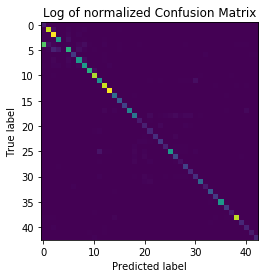

In [13]:
from sklearn.metrics import confusion_matrix

# Test model accuracy
with tf.Session() as sess:
    saver.restore(sess, tf.train.latest_checkpoint('.'))
    
    test_accuracy, test_loss, inference_data = evaluate(X_test_normalized, y_test)
    print("Test Accuracy = {:.3f}".format(test_accuracy))
    print("Test Loss = {:.3f}".format(test_loss))
    
    plt.title('Log of normalized Confusion Matrix')
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

    plt.imshow(confusion_matrix(y_true = y_test,y_pred = inference_data))


<h3>Question 4</h3>
How did you train your model? (Type of optimizer, batch size, epochs, hyperparameters, etc.)

<h3>Answer:</h3>
1. I am using the Adam Optimizer as part of the LeNet architecture.
2. Batch size is 128.
3. I am running this for 30 epochs.
4. I am using hyperparameters of mean=0 and stddev=0.1
5. Learning rate of 0.0009.


<h3>Question 5</h3>
What approach did you take in coming up with a solution to this problem? It may have been a process of trial and error, in which case, outline the steps you took to get to the final solution and why you chose those steps. Perhaps your solution involved an already well known implementation or architecture. In this case, discuss why you think this is suitable for the current problem.

<h3>Answer:</h3>
My approach was a trial and error , tweaking approach and building an intuition about how the parameters are related to each other. I had started with a more complex LeNet architecture and eventually reduced the network to a much simpler one. I realized that we really didn't need two convolution layers because the images are already cropped to the correct spot on the sign. Also we didn't need max-pooling because we were working with very small images and weren't doing a search on the image. But then I had very large kernel size, to reduce the kernel size, I had to go back to two levels of convolution and pooling pairs


---

## Step 3: Test a Model on New Images

To give yourself more insight into how your model is working, download at least five pictures of German traffic signs from the web and use your model to predict the traffic sign type.

You may find `signnames.csv` useful as it contains mappings from the class id (integer) to the actual sign name.

### Load and Output the Images

Testing 15 test images...
Inferred classes: [28 18 36 17 17  1 17 14 14 28 38 13 13 13 26]


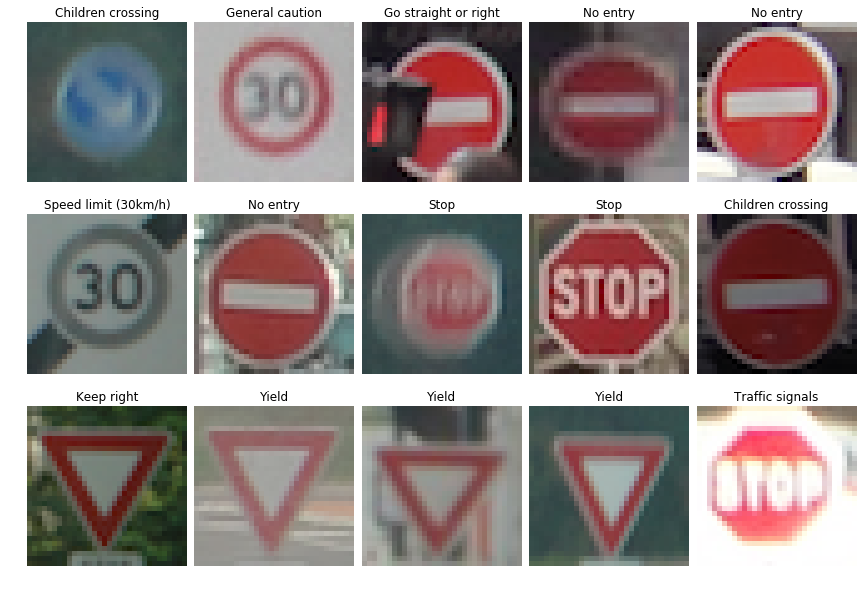

In [14]:
### Load the images and plot them here.
### Feel free to use as many code cells as needed.
import os
import matplotlib.image as mpimg

# test on image data
own_images = np.array([mpimg.imread("image_data/" + imageName) for imageName in os.listdir("image_data")])

# for image in own_images:
#     plt.imshow(image)
#     plt.show()

# convert to B/W
own_images_bw = numpy.array([cv2.cvtColor(image, cv2.COLOR_RGB2GRAY) for image in own_images])

# use absolute values
own_images_abs = numpy.array([cv2.convertScaleAbs(image) for image in own_images_bw])

# apply histogram equalization
own_images_hst_eq = numpy.array([cv2.equalizeHist(image) for image in own_images_abs])

# reshape for conv layer
own_images_reshaped = own_images_hst_eq[..., newaxis]

# normalize range
own_images_normalized = own_images_reshaped - np.mean(own_images_reshaped)

with tf.Session() as sess:
    print("Testing {} test images...".format(len(own_images)))
    saver.restore(sess, tf.train.latest_checkpoint('.'))
    
    inference_output = sess.run(inference_operation, feed_dict={x: own_images_normalized})
    print("Inferred classes:", inference_output)

    count = len(own_images)
    fig, axs = plt.subplots(3, 5, figsize=(15, 10))
    fig.subplots_adjust(hspace = .2, wspace=.001)
    axs = axs.ravel()
    for i in range(0, count):
        image = own_images[i]
        evaluated = inference_output[i]

        axs[i].axis('off')
        axs[i].set_title(sign_names[evaluated])
        axs[i].imshow(image)

<h3>Question 6</h3>
Choose five candidate images of traffic signs and provide them in the report. Are there any particular qualities of the image(s) that might make classification difficult? It could be helpful to plot the images in the notebook.

<h3>Answer:</h3>
I found around 15 images from the internet. I cropped out the traffic signs visually - but they are slightly skewed during resize. Which means it would be nice to train the data after squeezing/stretching the input images a bit. Also, one of the images has an obstruction over part of the sign. Let us see if it still recognises it


### Predict the Sign Type for Each Image

[28 18 36 17 17]


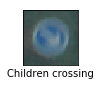

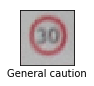

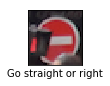

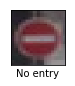

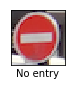

In [15]:
### Run the predictions here and use the model to output the prediction for each image.
### Make sure to pre-process the images with the same pre-processing pipeline used earlier.
### Feel free to use as many code cells as needed.
original_five = own_images[0:5]
sample_five = own_images_normalized[0:5]

with tf.Session() as sess:
    saver.restore(sess, tf.train.latest_checkpoint('.'))
    inference_output = sess.run(inference_operation, feed_dict={x: sample_five})
    print(inference_output)
    
for (image, evaluated)  in zip(original_five, inference_output):
    plt.figure(figsize=(1,1))
    plt.xticks([])
    plt.yticks([])
    plt.xlabel(sign_names[evaluated])
    plt.imshow(image)
    plt.show()

<h3>Question 7</h3>
Is your model able to perform equally well on captured pictures when compared to testing on the dataset? The simplest way to do this check the accuracy of the predictions. For example, if the model predicted 1 out of 5 signs correctly, it's 20% accurate.
NOTE: You could check the accuracy manually by using signnames.csv (same directory). This file has a mapping from the class id (0-42) to the corresponding sign name. So, you could take the class id the model outputs, lookup the name in signnames.csv and see if it matches the sign from the image.

<h3>Answer:</h3>
The model performance is good for common signs like STOP and NO ENTRY. I took a slice of 5 images above. It guessed only 3 of them correct. That is an accuracy of 60% compared to above 90% on the test set. Hence the model has been overfitting and did not do equally well on real data. It is surprising that inspite of correctly recognising one of the No Entry signs correctly, it did not recognise the other two.

### Analyze Performance

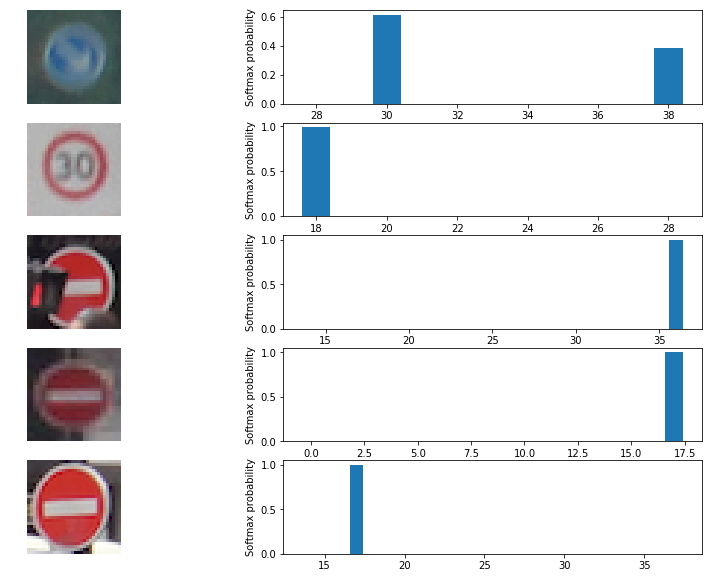

In [18]:
### Calculate the accuracy for these 5 new images. 
### For example, if the model predicted 1 out of 5 signs correctly, it's 20% accurate on these new images.
softmax_logits = tf.nn.softmax(logits)
top_k_operation = tf.nn.top_k(softmax_logits, k=3)

with tf.Session() as sess:
    saver.restore(sess, tf.train.latest_checkpoint('.'))
    top_k_output = sess.run(top_k_operation, feed_dict={x: sample_five})

    fig, axs = plt.subplots(5, 2, figsize=(15, 10))
    fig.subplots_adjust(hspace = .2, wspace=.001)
    axs = axs.ravel()
    for i, top_k_indices, top_k_values, image in zip(range(0, 10, 2), top_k_output.indices, top_k_output.values, original_five):
        axs[i].axis('off')
        axs[i].imshow(image)
        axs[i+1].set_ylabel('Softmax probability')

        axs[i+1].bar(top_k_indices, top_k_values)

### Output Top 5 Softmax Probabilities For Each Image Found on the Web

<h3>Question 8</h3>
Use the model's softmax probabilities to visualize the certainty of its predictions, tf.nn.top_k could prove helpful here. Which predictions is the model certain of? Uncertain? If the model was incorrect in its initial prediction, does the correct prediction appear in the top k? (k should be 5 at most)
tf.nn.top_k will return the values and indices (class ids) of the top k predictions. So if k=3, for each sign, it'll return the 3 largest probabilities (out of a possible 43) and the correspoding class ids

<h3>Answer:</h3>
1. Got the first image right with decent confidence compared to other classes.
2. In the second one, also it got it right. Though it seems to have predicted two classes with close confidence.
3. In the third one, due the obstruction towards the left, it got it wrong. Though it is confident of its prediction.
4. Got it correct, inspite of giving similar confidence to two other classes.
5. Got it wrong, inspite of having recognised another similar one. Also it appears confused between multiple options


For each of the new images, print out the model's softmax probabilities to show the **certainty** of the model's predictions (limit the output to the top 5 probabilities for each image). [`tf.nn.top_k`](https://www.tensorflow.org/versions/r0.12/api_docs/python/nn.html#top_k) could prove helpful here. 

The example below demonstrates how tf.nn.top_k can be used to find the top k predictions for each image.

`tf.nn.top_k` will return the values and indices (class ids) of the top k predictions. So if k=3, for each sign, it'll return the 3 largest probabilities (out of a possible 43) and the correspoding class ids.

Take this numpy array as an example. The values in the array represent predictions. The array contains softmax probabilities for five candidate images with six possible classes. `tk.nn.top_k` is used to choose the three classes with the highest probability:

```
# (5, 6) array
a = np.array([[ 0.24879643,  0.07032244,  0.12641572,  0.34763842,  0.07893497,
         0.12789202],
       [ 0.28086119,  0.27569815,  0.08594638,  0.0178669 ,  0.18063401,
         0.15899337],
       [ 0.26076848,  0.23664738,  0.08020603,  0.07001922,  0.1134371 ,
         0.23892179],
       [ 0.11943333,  0.29198961,  0.02605103,  0.26234032,  0.1351348 ,
         0.16505091],
       [ 0.09561176,  0.34396535,  0.0643941 ,  0.16240774,  0.24206137,
         0.09155967]])
```

Running it through `sess.run(tf.nn.top_k(tf.constant(a), k=3))` produces:

```
TopKV2(values=array([[ 0.34763842,  0.24879643,  0.12789202],
       [ 0.28086119,  0.27569815,  0.18063401],
       [ 0.26076848,  0.23892179,  0.23664738],
       [ 0.29198961,  0.26234032,  0.16505091],
       [ 0.34396535,  0.24206137,  0.16240774]]), indices=array([[3, 0, 5],
       [0, 1, 4],
       [0, 5, 1],
       [1, 3, 5],
       [1, 4, 3]], dtype=int32))
```

Looking just at the first row we get `[ 0.34763842,  0.24879643,  0.12789202]`, you can confirm these are the 3 largest probabilities in `a`. You'll also notice `[3, 0, 5]` are the corresponding indices.

### Project Writeup

Once you have completed the code implementation, document your results in a project writeup using this [template](https://github.com/udacity/CarND-Traffic-Sign-Classifier-Project/blob/master/writeup_template.md) as a guide. The writeup can be in a markdown or pdf file. 

> **Note**: Once you have completed all of the code implementations and successfully answered each question above, you may finalize your work by exporting the iPython Notebook as an HTML document. You can do this by using the menu above and navigating to  \n",
    "**File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission.